# Learning models from data: Mauna Loa CO$_2$ record

## Learning Goals
- introduce the principles of linear regression
- explore the impact of outliers in data
- discuss the limitations of models and discuss trends at different scales

## Context

Scripps institute of Oceanography has a research station at Mauna Loa in Hawaii where they have been measuring atmospheric CO$_2$ since 1958. The data we will focus on are the seasonally adjusted data. 

<img src="https://scrippsco2.ucsd.edu/assets/images/mlo_station_map.png" align="center">

**Data Source**

C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and  H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and  oceans from 1978 to 2000.  I. Global aspects, SIO Reference Series, No. 01-06, Scripps  Institution of Oceanography, San Diego, 88 pages, 2001. https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html   

## Running the notebook
- Each block of code can be run with `shift` + `enter` or from the menu with `Cell` + `Run Cells`
- If you need to restart the notebook, go to the menu: `Kernel` + `Restart`. 

## Import the python packages we use in this lesson 

These are standard packages in python, 
- `calendar` gives us utilities for converting between the month number and the name of the month
- `numpy` is the numerical array package in python
- `pandas` is the tool we use for managing data
- `matplotlib` has tools for plotting
- `ipywidgets` lets us connect interactive components like slide bars and toggle buttons to the code

In [16]:
import calendar
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import ipywidgets as widgets

# set a larger font size for viewing 
from matplotlib import rcParams
rcParams["font.size"] = 12

## Load the data from the excel file

Here we use the [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to load data from the excel file to a dataframe. 

In [2]:
mauna_loa_co2_data = pd.read_csv(
    "./data/monthly_in_situ_co2_mlo.csv", # location of the data file
    skiprows=np.arange(0, 56), # the data start on line 56 of the excel file
    na_values="-99.99"  # in the data file, -99.99 indicate missing values, so we ignore those
)

In [3]:
print(
    f"The first year in the data is {mauna_loa_co2_data['Year'].min()} "
    f"and the last year in the data set is {mauna_loa_co2_data['Year'].max()}." 
)

The first year in the data is 1958 and the last year in the data set is 2020.


Grab the columns of data we are interested in working with. Here we choose the `seasonally adjusted` data. If instead, you would prefer to work with the non-adjusted data, just replace `seasonally adjusted` with `CO2` in the cell below. 

In [4]:
dates = mauna_loa_co2_data["Date"]
co2 = mauna_loa_co2_data["seasonally adjusted [ppm]"]

## Define some helper functions for fetching data

- `get_data_between`  : fetches the seasonally adjusted CO$_2$ data from Mauna Loa between `year_min` and `year_max`

- `plot_co2_data` plots the data between `year_min` and `year_max`

In [5]:
def get_data_between(year_min=1958, year_max=2020, data_type="seasonally adjusted"):
    """
    A function to fetch data between year_min and year_max  
    """
        
    # find the data between the minimimum and maximum years
    indices = (mauna_loa_co2_data["Year"] >= year_min) & (mauna_loa_co2_data["Year"] <= year_max) 
    
    return dates[indices], co2[indices]
    

In [10]:
def plot_co2_data(dates, data, ax=None):
    """
    A function that we can use to plot data between year_min and year_max
    """
    
    # create a figure if one isn't supplied
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        
    # plot data
    ax.plot(dates, data, '.',  ms=8)
    ax.grid()
    ax.set_xlabel(f"Year")
    ax.set_ylabel(f"Seasonally adjusted CO$_2$ [ppm]")

## Plot the whole data set

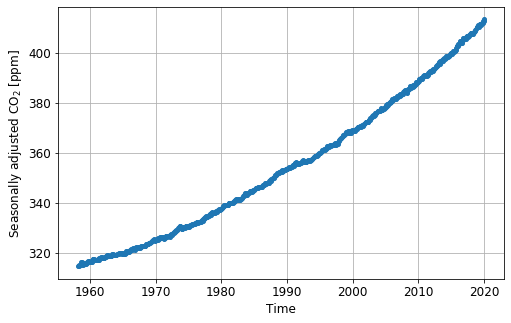

In [11]:
plot_co2_data(dates, co2)

## Focus on recent years: starting at 2018

**Question:** If the trend since 2018 continues, what would we expect the CO$_2$ concentration to be in January, 2022?  

**Note:** The Year includes a decimal in the following plot. That is how the month is indicated. For example: 
- January 2019 is 2019.00
- April 2019 is 2019.00 + 3/12 = 2019.25

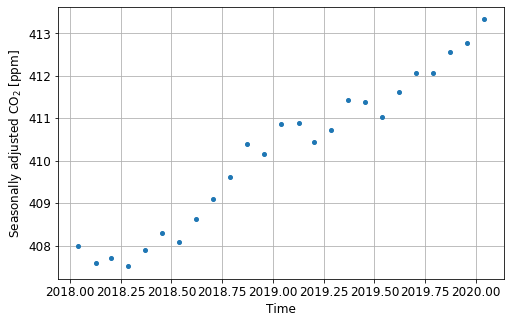

In [18]:
dates_after_2018, data_after_2018 = get_data_between(year_min=2018)
plot_co2_data(dates_after_2018, data_after_2018)

### Part 1: The "eyeball" norm 

- using the widgets below, estimate a slope and intercept of a line that fits the data
- the `slope` indicates the rate of CO$_2$ accumulation per year
- the `intercept` is the estimated concentration of CO$_2$ in January of the first year we consider

In [46]:
def add_line(dates, slope, intercept, ax=None):
    """
    A function to add a line to a plot
    """
    
    # create a figure if one isn't supplied
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    
    y = slope * (dates - dates.min()) + intercept
    ax.plot(dates, y)

In [47]:
def widget_fit_2018(slope, intercept):
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plot_co2_data(dates_after_2018, data_after_2018, ax=ax)
    ax.set_ylim([data_after_2018.min()-1, data_after_2018.max()+1])
    add_line(dates_after_2018, slope, intercept, ax)

widgets.interact(
    widget_fit_2018, 
    slope=widgets.FloatSlider(min=1, max=10, step=0.1),
    intercept=widgets.FloatSlider(min=407, max=415, step=0.25)
);

interactive(children=(FloatSlider(value=1.0, description='slope', max=10.0, min=1.0), FloatSlider(value=407.0,…

# Discuss with your neighbour

- What are the features of a "good fit"? 

### Part 2: Using least squares

In a linear regression, the measure of a `good fit` is 

$$
\phi = \sum_i (d_i^{pred} - d_i^{obs})^2
$$

So what we are asking for is to minimize the vertical distance between each point and the line. 


## Upcoming:

- How do we incorporate data uncertainties into our model?
- How do we fit models which are not linear? 